In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
%load_ext line_profiler
import seaborn as sns
%load_ext autoreload
%autoreload 2
from peaks.lm import curve_fit

In [2]:
def test_func(xdata, a0, x0, sigma0, a1, x1, sigma1, o):
    """An exponential decay"""
    return a0 * np.exp(-(xdata-x0)**2 / sigma0**2) + a1 * np.exp(-(xdata-x1)**2 / sigma1**2) + o

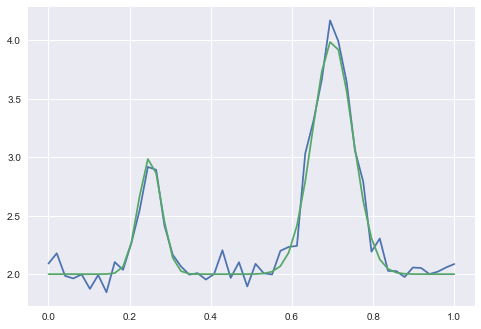

In [8]:
x = np.linspace(0,1)
preal = np.array([1, 0.25, .04, 2, 0.7, 0.07, 2])
y_real = test_func(x, *preal)
y = y_real + np.random.randn(len(y_real)) * 0.1
plt.plot(x, y, x, y_real)

In [9]:
def test_func_jac(xdata, a0, x0, sigma0, a1, x1, sigma1, o):
    """An exponential decay"""
    dyda0 = np.exp(-(xdata-x0)**2 / sigma0**2)
    dydx0 = 2 * a0 * (xdata-x0) * dyda0 / sigma0**2
    dydsigma0 = dydx0 * (xdata-x0) / sigma0
    
    dyda1 = np.exp(-(xdata-x1)**2 / sigma1**2)
    dydx1 = 2 * a1 * (xdata-x1) * dyda1 / sigma1**2
    dydsigma1 = dydx1 * (xdata-x1) / sigma1
    
    dydo = np.ones_like(dyda0)
    
    to_return = np.concatenate((dyda0, dydx0, dydsigma0, dyda1, dydx1, dydsigma1, dydo))
    to_return.shape = (7, -1)
#     to_return = np.vstack((dyda0, dydx0, dydsigma0, dyda1, dydx1, dydsigma1, dydo))
    return to_return.T

2.55 ms ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
60.9 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.68 ms ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


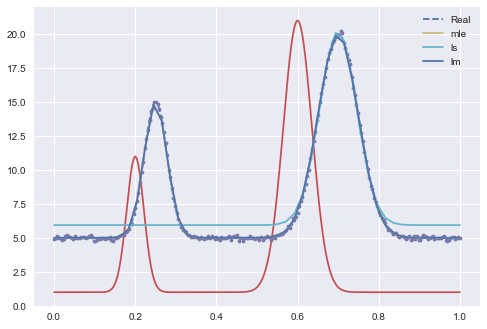

In [13]:
preal_ls = np.array([10, 0.25, .04, 15, 0.7, 0.07, 5])

x_ls = np.linspace(0,1, 256)
y_real_ls = test_func(x_ls, *preal_ls)

plt.plot(x_ls, y_real_ls, "--", label="Real")

y_ls = y_real_ls + np.random.randn(len(y_real_ls))*0.1

pguess_ls = np.array([ 10  ,  0.20,  0.03,  20.  ,  0.6 ,  0.05 ,  1.  ])
y_guess_ls = test_func(x_ls, *pguess_ls)
plt.plot(x_ls, y_ls, ".")
plt.plot(x_ls, y_guess_ls)

plt.plot(x_ls, y_ls, ".")
for meth in ("mle", "ls", "lm"):
    def opt():
        return curve_fit(
                    test_func, x_ls, y_ls, p0=pguess, full_output=True,
                    jac=test_func_jac, method=meth)
    popt, pcov, infodict, errmsg, ier = opt()
    y_fit_ls = test_func(x, *popt)
    plt.plot(x, y_fit_ls, label=meth)
    %timeit opt()
plt.legend()

## Compare methods

C:\Users\hoffmand\Box Sync\Python\peaks\lm.py:62: RuntimeWarning: divide by zero encountered in true_divide
  part2 = - (y * np.log(f / y))[y > 0].sum(0)
C:\Users\hoffmand\Box Sync\Python\peaks\lm.py:62: RuntimeWarning: invalid value encountered in multiply
  part2 = - (y * np.log(f / y))[y > 0].sum(0)
C:\Users\hoffmand\Box Sync\Python\peaks\lm.py:62: RuntimeWarning: divide by zero encountered in true_divide
  part2 = - (y * np.log(f / y))[y > 0].sum(0)
C:\Users\hoffmand\Box Sync\Python\peaks\lm.py:62: RuntimeWarning: invalid value encountered in multiply
  part2 = - (y * np.log(f / y))[y > 0].sum(0)


2.94 ms ± 5.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.7 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.91 ms ± 4.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


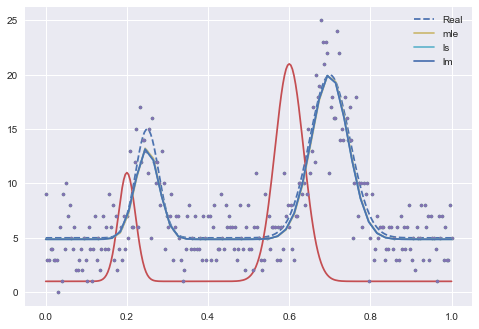

In [15]:
preal_mle = np.array([10, 0.25, .04, 15, 0.7, 0.07, 5])

x_mle = np.linspace(0,1, 256)
y_real_mle = test_func(x_mle, *preal_mle)

plt.plot(x_mle, y_real_mle, "--", label="Real")

y_mle = np.random.poisson(y_real_mle)

pguess_mle = np.array([ 10  ,  0.20,  0.03,  20.  ,  0.6 ,  0.05 ,  1.  ])
y_guess_mle = test_func(x_mle, *pguess_mle)
plt.plot(x_mle, y_mle, ".")
plt.plot(x_mle, y_guess_mle)

plt.plot(x_mle, y_mle, ".")
for meth in ("mle", "ls", "lm"):
    def opt():
        return curve_fit(
                    test_func, x_mle, y_mle, p0=pguess, full_output=True,
                    jac=test_func_jac, method=meth)
    popt, pcov, infodict, errmsg, ier = opt()
    y_fit_mle = test_func(x, *popt)
    plt.plot(x, y_fit_mle, label=meth)
    %timeit opt()
plt.legend()